### Gaussian anomaly detection algorithm applied to detect failing servers on a network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The dataset contains two features -
   * throughput (mb/s) and
   * latency (ms) of response of each server.
There might be some examples of servers acting anomalously within the dataset.

#### Loading the dataset

In [3]:
#@title
X_train = np.array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944],
       [13.92240251, 13.40646894],
       [12.82213164, 14.22318782],
       [15.67636615, 15.89169137],
       [16.16287532, 16.20299807],
       [12.66645095, 14.89908374],
       [13.98454962, 12.95800822],
       [14.06146043, 14.54908874],
       [13.38988671, 15.56202142],
       [13.39350475, 15.62698794],
       [13.97900926, 13.28061494],
       [14.16791259, 14.46583829],
       [13.96176145, 14.75182421],
       [14.45899735, 15.07018563],
       [14.58476372, 15.82743424],
       [12.07427074, 13.0671109 ],
       [13.5491294 , 15.53827677],
       [13.98625042, 14.78776304],
       [14.96991942, 16.51830493],
       [14.25576597, 15.29427277],
       [15.33425   , 16.12469989],
       [15.6350487 , 16.49094477],
       [13.62081292, 15.45947525],
       [14.81548485, 15.33956527],
       [14.59318973, 14.61238106],
       [14.48906755, 15.64087368],
       [15.52704801, 14.63568031],
       [13.97506707, 14.76531533],
       [12.95364954, 14.82328512],
       [12.88787444, 15.0760781 ],
       [16.02178961, 16.25746992],
       [14.92629271, 16.29725072],
       [12.465594  , 14.18321212],
       [14.08466278, 14.44192203],
       [14.53717523, 14.24224248],
       [14.22250852, 15.42386188],
       [14.51908496, 13.99871699],
       [13.11971434, 14.66081846],
       [14.51088894, 15.30465149],
       [14.18262426, 15.39388968],
       [14.71651845, 15.73369667],
       [13.834547  , 16.17138034],
       [16.00076179, 14.6923297 ],
       [14.12702715, 15.91462775],
       [13.84578547, 14.34139349],
       [15.4142611 , 16.24243182],
       [13.25273727, 15.00861364],
       [13.66840226, 14.35886036],
       [13.77534774, 14.73808512],
       [14.12582343, 14.92980923],
       [14.54724604, 15.63339445],
       [14.15258077, 14.53622697],
       [14.12648161, 15.34467591],
       [14.26324658, 14.98556918],
       [14.77324332, 15.25299474],
       [14.20969934, 16.14572569],
       [13.26065515, 15.48016214],
       [14.25273351, 15.03134361],
       [12.92124447, 13.1932154 ],
       [13.85243129, 13.33213111],
       [13.968568  , 13.19821237],
       [13.25206982, 15.3684639 ],
       [13.70449634, 13.21431302],
       [14.50874721, 15.46051652],
       [15.69042696, 16.48168852],
       [12.95598192, 12.43703006],
       [13.59312604, 14.84189903],
       [15.12874639, 17.14981223],
       [14.26705037, 15.67551974],
       [15.66145055, 14.81146451],
       [14.33962673, 15.49202298],
       [14.27617655, 14.70590693],
       [14.86049072, 15.59000779],
       [14.1041448 , 15.18050456],
       [15.98828286, 15.62105187],
       [13.47473583, 15.59307142],
       [13.77637601, 14.99194427],
       [12.82770875, 15.67136907],
       [13.67165486, 15.11954159],
       [15.38704284, 15.56936935],
       [15.54320934, 15.5154315 ],
       [13.85306094, 15.60672437],
       [13.62525246, 14.45209463],
       [15.01577844, 14.91664093],
       [13.83645753, 15.24940725],
       [14.22694439, 14.34798436],
       [13.23742625, 14.61058751],
       [13.38482919, 14.7331933 ],
       [13.87130103, 14.97399469],
       [12.39445847, 14.64448217],
       [14.32186558, 14.52890629],
       [15.82965092, 15.71619455],
       [15.80177302, 16.01808914],
       [14.697512  , 14.11198749],
       [14.70598657, 16.46040295],
       [13.5915686 , 14.91975097],
       [12.29984539, 14.77119468],
       [13.39904748, 16.11912911],
       [15.1311287 , 15.9003113 ],
       [15.38581198, 15.71453967],
       [15.45487422, 15.44042242],
       [13.74951531, 15.26803136],
       [15.69914333, 16.05595815],
       [14.80580491, 14.33258926],
       [15.17222943, 16.70624398],
       [11.24915512, 15.13295896],
       [13.88773907, 14.48548132],
       [15.32587018, 16.58524064],
       [12.97517063, 15.16056771],
       [14.07427781, 17.21973519],
       [14.18202564, 17.83351945],
       [12.23970014, 14.72866834],
       [14.82555961, 15.94500685],
       [13.09763368, 16.230365  ],
       [13.85758878, 15.03526838],
       [15.52502523, 16.78653608],
       [15.31499528, 14.56835428],
       [14.03034874, 15.66336188],
       [14.42312995, 14.94109335],
       [13.63615119, 14.96411634],
       [14.53477943, 13.35611764],
       [14.61566224, 14.15241035],
       [13.08085544, 14.02845941],
       [14.93928678, 14.54933746],
       [16.02712663, 15.7096583 ],
       [14.31925037, 15.11762658],
       [14.86153307, 14.28458412],
       [14.01432033, 16.77971266],
       [13.4076547 , 14.60041191],
       [13.07959732, 14.19389917],
       [12.68820689, 13.81109597],
       [14.19232757, 15.36498179],
       [14.86589365, 14.4713879 ],
       [13.39350298, 14.34389893],
       [13.58659143, 14.39148496],
       [13.1021929 , 14.3760326 ],
       [14.54176556, 16.37233995],
       [14.25602703, 15.0423495 ],
       [16.1875476 , 16.36145254],
       [13.63292363, 13.62886894],
       [14.65349335, 14.97649221],
       [12.619118  , 16.77214314],
       [13.0342773 , 14.25689091],
       [10.85940052, 14.47914434],
       [12.93486071, 14.60746678],
       [13.99226766, 14.96212808],
       [12.57248704, 15.1972735 ],
       [15.68266703, 16.22123922],
       [13.21258152, 14.35182737],
       [13.98975002, 14.5244565 ],
       [13.46626641, 13.65765529],
       [13.13166385, 15.79882584],
       [14.35439255, 15.02329268],
       [13.55329411, 13.73218769],
       [12.98628429, 14.80983707],
       [14.37264883, 14.95148191],
       [13.5886905 , 15.19778175],
       [12.26002252, 15.61364104],
       [13.66602494, 16.44517365],
       [14.34554567, 15.44883765],
       [14.60667498, 15.77655361],
       [14.15369524, 16.57440586],
       [14.04899502, 14.39078838],
       [14.06857464, 14.62364257],
       [15.88890082, 16.33705609],
       [13.9760142 , 15.84206443],
       [10.88221341, 13.46166188],
       [13.90920312, 14.97657577],
       [12.36776146, 15.14204982],
       [15.16765639, 15.51933857],
       [15.33769517, 14.23319145],
       [13.5505769 , 15.73044061],
       [13.57918657, 15.47264441],
       [14.2447909 , 15.08509119],
       [15.33086297, 15.71142599],
       [15.91714893, 15.15651433],
       [13.85421254, 15.32125758],
       [14.08736591, 14.30728374],
       [12.63610997, 15.65066102],
       [14.36282756, 13.87195409],
       [14.50066606, 14.61759025],
       [13.96984547, 16.17341605],
       [15.13133128, 15.28924849],
       [15.15300231, 14.0136283 ],
       [13.31011939, 14.39060275],
       [14.25712173, 14.29705004],
       [13.71613135, 13.5273347 ],
       [15.70094058, 15.99611429],
       [13.38943515, 14.36513423],
       [14.14088666, 13.97440554],
       [14.8448705 , 14.01695106],
       [12.7048959 , 14.27293037],
       [14.95353525, 14.73218902],
       [14.28114118, 14.61262378],
       [13.06799074, 14.83286345],
       [13.602797  , 12.20295199],
       [12.68816488, 15.81141681],
       [13.88291728, 14.1180837 ],
       [14.01648222, 14.33509982],
       [15.3657655 , 15.82610475],
       [13.57764756, 14.88045533],
       [13.39189242, 14.34497756],
       [13.6936209 , 15.9218994 ],
       [12.87853442, 13.2017448 ],
       [13.69916365, 15.4180007 ],
       [14.01609081, 15.82165925],
       [14.58996505, 16.38090675],
       [15.00784342, 15.50954334],
       [14.05950746, 13.75788684],
       [14.46114684, 13.34425721],
       [14.64474777, 15.03905866],
       [13.85478898, 15.86614261],
       [14.28141751, 14.02340696],
       [14.93304554, 14.32639552],
       [13.76930807, 16.5131053 ],
       [13.44404345, 15.07922663],
       [14.03179286, 14.40986664],
       [13.8194684 , 15.58676798],
       [16.50656641, 15.22029747],
       [12.20423231, 14.32106065],
       [14.88192989, 16.36162231],
       [15.16031   , 15.14972042],
       [11.78759609, 14.55034169],
       [12.88388298, 14.57250348],
       [13.62023706, 16.4236925 ],
       [14.53049363, 15.44664319],
       [12.64616608, 15.10838775],
       [15.54763373, 16.43238821],
       [14.40076998, 15.21258204],
       [15.2105839 , 14.93547994],
       [15.0617344 , 15.11740666],
       [14.8621459 , 14.70177771],
       [15.40451989, 15.34490712],
       [13.79430575, 14.68727111],
       [14.63390272, 16.30082804],
       [12.45687581, 15.54617986],
       [13.99759773, 16.73594542],
       [12.93253734, 12.62389977],
       [13.70345191, 14.71480993],
       [13.12395594, 15.44848981],
       [13.81691009, 14.09233539],
       [13.02489337, 14.25050252],
       [14.53425535, 15.76596517],
       [13.2518626 , 16.32252319],
       [13.23657555, 15.3369661 ],
       [12.12971316, 12.66688846],
       [14.38088736, 16.03087165],
       [15.98239722, 15.52399453],
       [13.7510791 , 13.64320738],
       [13.35730012, 13.42431786],
       [13.0855909 , 14.86775906],
       [13.61173302, 14.86806414],
       [15.17761737, 14.15354188],
       [14.15456589, 15.28746898],
       [13.22531906, 13.9598547 ],
       [13.94151501, 14.76023193],
       [15.39066479, 15.71412823],
       [13.17642607, 13.67395694],
       [13.38689006, 14.66536822],
       [15.15888821, 14.78211271],
       [14.55599225, 14.04946256],
       [14.62692886, 14.29592015],
       [13.28624407, 15.65812607],
       [13.81548235, 14.17169431],
       [14.31098964, 16.2541906 ],
       [13.53597112, 15.77020127],
       [14.80103055, 13.8181314 ],
       [13.77274486, 14.64955361],
       [13.76510157, 15.02311287],
       [14.05349836, 13.93946896],
       [15.3090539 , 16.04190605],
       [13.15523771, 16.92122117],
       [12.69940391, 13.99916734],
       [14.36799225, 16.75782354],
       [13.26325419, 14.09898706],
       [11.91253509, 14.61325734],
       [13.37000592, 15.18268143],
       [15.99450697, 15.45329383],
       [14.15764861, 13.77083847],
       [14.96982662, 15.59222553],
       [14.75068711, 15.46889188],
       [13.3302792 , 14.34699591],
       [13.05002153, 14.68726189],
       [13.77642647, 14.23618564],
       [15.17426585, 15.50957491],
       [14.21251759, 15.08270517],
       [13.82089483, 15.61146316],
       [14.12355955, 14.95509754],
       [14.54752171, 14.85861945],
       [14.09944359, 16.031312  ],
       [14.5773018 , 14.25667659],
       [14.52331832, 14.23004999],
       [14.30044704, 15.26643299],
       [14.55839286, 15.48691914],
       [14.22494187, 15.86117827],
       [12.04029344, 13.3448335 ],
       [13.07931049,  9.34787812],
       [21.72713402,  4.12623222],
       [12.47662882, 14.45936967],
       [19.58257277, 10.411619  ],
       [23.33986753, 16.29887355],
       [18.26118844, 17.978309  ],
       [ 4.75261282, 24.35040725]])

X_val = np.array([[15.79025979, 14.9210243 ],
       [13.63961877, 15.32995521],
       [14.86589943, 16.47386514],
       [13.58467605, 13.98930611],
       [13.46404167, 15.63533011],
       [12.94888838, 16.14006828],
       [15.31084155, 15.17480137],
       [13.89795241, 15.43169469],
       [11.92096525, 14.30579937],
       [14.85934119, 14.90066474],
       [13.63501268, 14.5620583 ],
       [15.75981741, 15.13340409],
       [15.221965  , 14.18491044],
       [12.10564111, 13.42653822],
       [14.80848889, 13.87075725],
       [15.36135887, 15.99014917],
       [12.72914442, 15.8265107 ],
       [15.38533789, 15.21036416],
       [13.81810534, 14.29933915],
       [15.3788488 , 15.90228514],
       [14.11232153, 15.31616729],
       [12.82415241, 13.6971992 ],
       [14.58354683, 14.99675181],
       [14.2948367 , 15.84651796],
       [13.5112881 , 15.5909427 ],
       [13.71433284, 15.35484382],
       [12.85788467, 14.00239134],
       [14.56998008, 14.22432035],
       [15.59049569, 15.72143533],
       [13.0999943 , 15.0900635 ],
       [14.61461465, 14.85494525],
       [13.92751557, 16.09420913],
       [13.28968651, 15.42177935],
       [14.3283751 , 15.01104801],
       [12.99369072, 15.02922303],
       [13.21733162, 15.02076411],
       [13.72874052, 14.03641262],
       [12.59667946, 13.4656785 ],
       [14.03082134, 16.31086646],
       [14.06074927, 15.32971274],
       [15.26965979, 15.57677091],
       [15.88197423, 15.46171487],
       [15.07180425, 14.41570779],
       [13.98475169, 15.47191457],
       [14.16180226, 14.81511294],
       [14.68681165, 14.4135602 ],
       [14.11912326, 16.76631594],
       [14.31950715, 15.38060917],
       [13.30913392, 15.04326285],
       [13.55172581, 14.01841776],
       [15.17132208, 16.01400507],
       [14.28066671, 14.99449541],
       [13.33650871, 15.04163178],
       [14.37685832, 15.67875169],
       [14.32568928, 16.46964189],
       [14.62490061, 14.23414926],
       [14.16924635, 14.10672629],
       [12.97208251, 15.48929247],
       [12.37375969, 14.88116275],
       [15.15445808, 15.0582492 ],
       [14.09323314, 14.77153793],
       [12.59487824, 15.03964065],
       [13.61531825, 14.72143194],
       [12.6703164 , 15.98640261],
       [14.70384383, 15.88781645],
       [15.2784321 , 13.89330889],
       [13.27130435, 14.50718273],
       [14.13665397, 14.78041494],
       [15.29429909, 16.50677624],
       [14.66965517, 15.35344792],
       [14.0310698 , 13.72965634],
       [13.77413651, 14.76038557],
       [14.55210322, 16.64400568],
       [13.88568273, 14.79989352],
       [14.43425109, 14.33892364],
       [13.38583496, 15.0647589 ],
       [13.82625926, 16.44912145],
       [15.20555071, 15.76067152],
       [12.37135055, 13.21485305],
       [14.54985291, 16.11598571],
       [13.10468926, 16.56205392],
       [14.2203734 , 15.83069251],
       [13.80457396, 15.90347001],
       [15.18526977, 14.95410843],
       [13.85934089, 14.40717801],
       [14.81049202, 14.46868053],
       [12.7991686 , 14.04732812],
       [13.69668884, 14.28669635],
       [13.3206795 , 15.49250853],
       [14.08867829, 14.93269935],
       [13.76749643, 15.91294143],
       [12.49858359, 14.68750206],
       [13.35537829, 14.73761662],
       [14.56724348, 13.74880102],
       [13.55310828, 13.90648027],
       [15.11251791, 16.28618183],
       [13.04640664, 14.81646156],
       [14.74502514, 15.31586239],
       [13.13972747, 14.92981553],
       [14.35081   , 14.26328203],
       [13.13451519, 14.65572286],
       [13.87452281, 14.3273369 ],
       [14.76576876, 14.63957615],
       [13.61945237, 15.45204216],
       [13.54198683, 15.77521296],
       [14.88159033, 16.03220318],
       [14.74996901, 16.60606524],
       [14.0748595 , 14.99378238],
       [12.78449324, 13.7919081 ],
       [13.61327305, 14.80372459],
       [14.21903476, 14.48382319],
       [15.5859244 , 15.20783289],
       [11.84877236, 14.3774067 ],
       [15.1429493 , 15.26416202],
       [14.60817611, 16.80793076],
       [15.72828976, 14.93341663],
       [14.55127152, 15.63505758],
       [13.64514063, 14.46630308],
       [15.18798541, 14.94204643],
       [13.9000606 , 14.66837213],
       [13.02248185, 14.9435763 ],
       [15.14686698, 13.86433549],
       [14.13543106, 15.13522975],
       [13.733598  , 14.28115979],
       [13.77432851, 14.42481069],
       [13.11413368, 15.53025403],
       [15.15066886, 16.99323463],
       [12.28059021, 12.75685404],
       [14.6988571 , 14.73239324],
       [14.55340042, 15.37830194],
       [14.27355881, 15.18602603],
       [14.70171505, 15.86309524],
       [12.25143392, 14.40360306],
       [14.74878324, 14.47983954],
       [13.46309378, 15.05274061],
       [14.76333666, 14.14755835],
       [11.62236738, 13.62309737],
       [14.55053465, 16.21807312],
       [11.84160831, 13.72135487],
       [13.69405337, 15.81486434],
       [14.85251231, 16.0106634 ],
       [14.756127  , 15.51631566],
       [13.52687052, 15.48714247],
       [14.61894876, 15.40657867],
       [13.36647536, 15.35878896],
       [13.87044181, 15.52042335],
       [14.48770605, 13.97069786],
       [14.64611411, 15.74334948],
       [13.34341527, 13.57808478],
       [13.77508716, 15.43739277],
       [12.29866617, 15.22203763],
       [13.85724841, 14.81052685],
       [13.71485307, 13.84977752],
       [15.39185265, 14.13526994],
       [14.12347745, 15.71456025],
       [14.49917519, 13.59404997],
       [14.07032117, 15.25408497],
       [14.22521319, 14.59313293],
       [13.39952251, 14.60049699],
       [14.47486797, 14.81460351],
       [13.60067241, 14.60926993],
       [14.32372317, 16.63508873],
       [15.59737154, 16.45214996],
       [14.58198574, 16.17852319],
       [14.43553655, 15.91046051],
       [13.23628167, 14.52027327],
       [15.34634414, 14.73940678],
       [13.93830112, 15.44490569],
       [13.19517544, 12.46754329],
       [13.32079853, 16.22371877],
       [15.03392842, 15.67469081],
       [15.01191645, 16.16858088],
       [15.10625456, 15.96225727],
       [13.09537682, 14.25229021],
       [13.29228733, 13.12231685],
       [13.70430606, 15.53321525],
       [13.2457956 , 13.22192207],
       [13.48718453, 14.13212334],
       [13.17153906, 14.82987435],
       [13.44713917, 14.6628099 ],
       [14.11048218, 14.98662464],
       [14.1840563 , 16.76908663],
       [12.1376679 , 13.89011418],
       [13.95063382, 15.92542649],
       [13.33703698, 15.09810307],
       [14.1068043 , 15.97827554],
       [14.88081172, 15.45430538],
       [14.36387817, 14.05679133],
       [12.57801724, 14.07032626],
       [13.41604702, 15.0982475 ],
       [12.29514655, 14.15596603],
       [13.97086464, 14.63128569],
       [12.96275606, 11.86533339],
       [14.12157545, 15.73859047],
       [13.34231731, 14.38196114],
       [13.70887357, 15.36500802],
       [12.70758555, 14.93259933],
       [13.60864644, 15.22450303],
       [13.40229831, 15.84763814],
       [15.15743452, 16.46288119],
       [14.67704336, 16.01014358],
       [15.16813703, 13.56380986],
       [14.74962918, 14.66693912],
       [15.24464252, 16.29016348],
       [13.63574452, 15.17916503],
       [13.00766971, 13.94245336],
       [15.34193814, 16.03501453],
       [13.36310859, 14.91711663],
       [14.9114818 , 14.84537958],
       [14.3544372 , 15.44774531],
       [14.59927642, 14.84129512],
       [15.32617181, 15.85433537],
       [13.35802796, 15.54722498],
       [12.37821423, 14.25632012],
       [14.44913697, 14.45326718],
       [12.98596224, 16.48558468],
       [12.25441806, 13.69954048],
       [13.78495344, 15.44043283],
       [15.53519014, 15.77650123],
       [12.7143176 , 15.8338626 ],
       [13.84365087, 14.52497748],
       [14.01413774, 15.0580024 ],
       [12.75116532, 15.75760879],
       [14.53921772, 14.91350179],
       [12.52867075, 13.5524341 ],
       [14.82230557, 15.40939087],
       [13.35172448, 14.99142391],
       [13.10391157, 15.21232095],
       [13.16462331, 16.1477798 ],
       [14.52926811, 14.90199065],
       [13.90186287, 13.83934939],
       [14.98968267, 15.33690286],
       [13.58021353, 15.59497157],
       [14.12104239, 13.82070713],
       [12.9693767 , 14.22215207],
       [17.07013409, 14.53997908],
       [15.38705988, 16.71875767],
       [14.1621505 , 15.40618751],
       [13.94772461, 16.34704024],
       [14.67980403, 16.30312414],
       [14.47182049, 15.15400447],
       [13.36444751, 13.04052066],
       [12.02658725, 14.27728936],
       [14.69042218, 14.97190977],
       [13.21560372, 15.05708691],
       [14.93909926, 16.85608622],
       [15.60499508, 18.95782891],
       [13.03156495, 16.71177442],
       [15.00737263, 16.68395173],
       [14.52023636, 14.52605208],
       [14.85007496, 14.19304875],
       [14.59421204, 14.36518348],
       [15.78707013, 16.2010085 ],
       [13.92226956, 14.37718066],
       [14.95964562, 16.6961271 ],
       [14.52675873, 14.61560122],
       [11.77803878, 14.73074424],
       [12.85649088, 14.00372929],
       [13.01590318, 14.99908843],
       [15.15101284, 15.87344402],
       [14.19146054, 14.67040814],
       [12.183906  , 13.19170146],
       [13.79226837, 14.14814759],
       [13.68881617, 15.95720573],
       [13.83500061, 15.24339251],
       [14.74217984, 14.52442752],
       [12.94303825, 15.46480315],
       [13.65496338, 13.97761516],
       [15.59498363, 15.04604092],
       [13.77008383, 15.37245864],
       [16.22018163, 14.39283954],
       [13.55607802, 13.83297533],
       [14.71220536, 15.16641362],
       [14.27820667, 15.55103063],
       [13.22755893, 13.69724152],
       [13.17133235, 13.04379718],
       [15.22006247, 15.70013751],
       [13.08066651, 14.4721085 ],
       [13.68249708, 14.24206174],
       [12.77175209, 14.871004  ],
       [14.86570241, 15.49827743],
       [15.14607309, 16.29564812],
       [13.03209836, 14.3741401 ],
       [16.30279756, 14.08390865],
       [13.71637966, 16.42810744],
       [13.774717  , 13.43185858],
       [15.06428103, 15.40919076],
       [12.31709854, 14.07138374],
       [14.22752068, 15.52426551],
       [14.68203811, 14.84174825],
       [14.21854325, 14.60653412],
       [14.38357023, 15.40524125],
       [14.74583961, 16.98098743],
       [13.76985292, 13.51609816],
       [14.02613574, 14.18109333],
       [12.71425699, 14.42331522],
       [14.22494922, 16.28424729],
       [14.29334503, 15.9913826 ],
       [14.95248197, 14.36405347],
       [14.73404568, 15.81833149],
       [19.28954011, 10.67574063],
       [ 8.7385712 , 16.79580754],
       [ 0.30793846,  5.39141258],
       [28.54178582, 21.59977621],
       [19.03498788, 12.02894863],
       [14.37577873, 23.35597256],
       [ 8.77806588, 16.68952644]])

y_val = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])


#### Plot training data

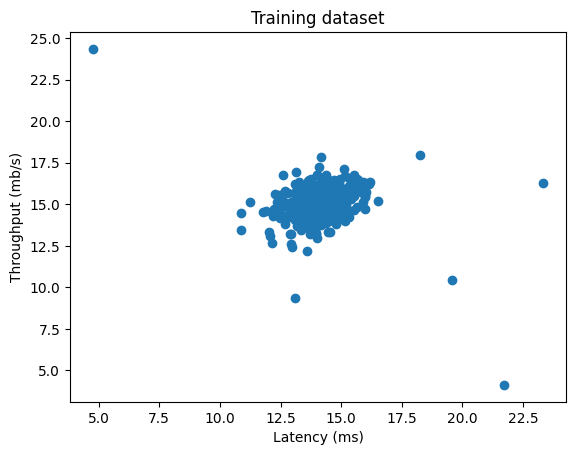

In [4]:
plt.scatter(X_train[:,0], X_train[:, 1])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Training dataset')

plt.show()

#### Check if the distribution of throughput and latency is Gaussian

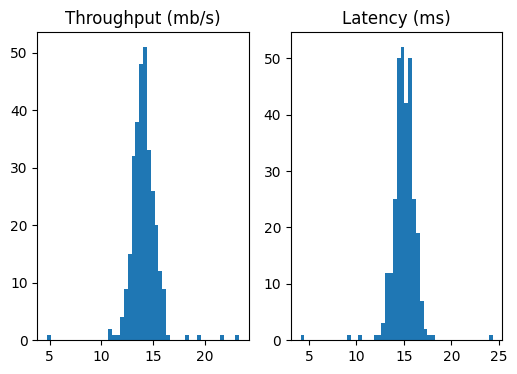

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(6,4)

ax[0].hist(X_train[:,0], bins = 50)
ax[0].set(title = 'Throughput (mb/s)')

ax[1].hist(X_train[:,1], bins = 50)
ax[1].set(title = 'Latency (ms)')

plt.show()


#### Estimate Gaussian distribution for each feature

In [9]:
def estimate_gaussian(X):
    """
    Calculates mean and variance of all features
    in the dataset

    Args:
        X (ndarray): (m, n) Data matrix

    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    mu = np.mean(X, axis = 0)
    var = np.var(X, axis = 0)

    return mu, var

#### Implement multivariate Gaussian function

In [10]:
def multi_gaussian(X, mu, var):
  """
  Args:
    X (ndarray): (m, n) Data matrix
    mu (ndarray): (n,) Mean of all features
    var (ndarray): (n,) Variance of all features
  Returns:
    p_val (ndarray): (n, ) joint probability of observing each result (assumes independence of observations)
  """
  gauss = 1/(np.sqrt(2*np.pi*var)) * np.exp(-(X - mu)**2/(2*var))
  p_val = np.prod(gauss, axis = 1)

  return p_val


#### Determine threshold $\epsilon$

* The low probability examples are more likely to be the anomalies in the dataset.
* One way to determine which examples are anomalies is to select a threshold based on a cross validation set.

`select_threshold` function is going to be used to select the threshold $\varepsilon$ using the $F_1$ score on a cross validation set.

* For this, a cross validation set
$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$ will be used, where the label $y=1$ corresponds to an anomalous example, and $y=0$ corresponds to a normal example.
* For each cross validation example, $p(x_{\rm cv}^{(i)})$ will be computed. The vector of all of these probabilities $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv})})$ is passed to `select_threshold` in the vector `p_val`.
* The corresponding labels $y_{\rm cv}^{(1)}, \ldots, y_{\rm cv}^{(m_{\rm cv})}$ are passed to the same function in the vector `y_val`.

In [11]:
def select_threshold(y_val, p_val):
    """
    Finds the best threshold to use for selecting outliers
    based on the results from a validation set (p_val)
    and the ground truth (y_val)

    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set

    Returns:
        epsilon (float): Threshold chosen
        F1 (float):      F1 score by choosing epsilon as threshold
    """

    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    # Check for 1000 epsilons (no point checking epsilon < p_min and epsilon > p_max)
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):

        true_positives = np.sum(y_val[(p_val < epsilon)] == 1)
        false_positives = np.sum(y_val[(p_val < epsilon)] == 0)
        false_negatives = np.sum(y_val[(p_val >= epsilon)] == 1)

        precision = true_positives/(true_positives + false_positives)
        recall = true_positives/(true_positives + false_negatives)
        F1 = 2 * precision*recall/(precision + recall)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1

#### Find best epsilon and F1-score based on validation set

In [12]:
mu, var = estimate_gaussian(X_val)
p_val = multi_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

Best epsilon found using cross-validation: 1.572946e-04
Best F1 on Cross Validation Set: 0.875000


<ipython-input-11-02f2a07dc0e7>:29: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positives/(true_positives + false_positives)


#### Find outliers in the training set

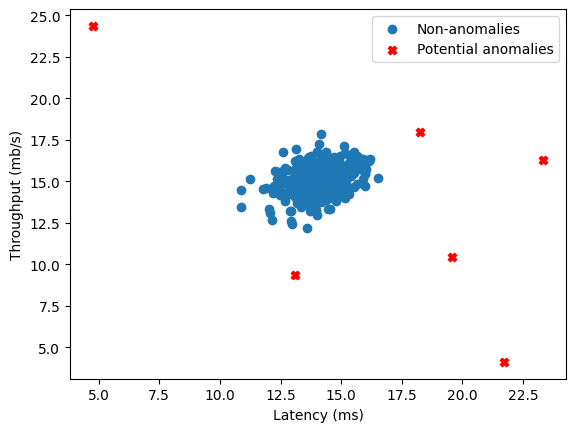

In [18]:
mu, var = estimate_gaussian(X_train)
p_val = multi_gaussian(X_train, mu, var)

outliers = p_val < epsilon

X_outliers = X_train[outliers]
X_non_outliers = X_train[~outliers]

# Plot non-outliers
plt.scatter(X_non_outliers[:,0], X_non_outliers[:, 1], label = "Non-anomalies")

# Plot outliers
plt.scatter(X_outliers[:,0], X_outliers[:, 1], color = 'red', marker = "X", label = "Potential anomalies")

plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.legend()
plt.show()